In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
# Load the data
data = pd.read_csv('1000_Companies.tsv', sep='\t')

In [15]:
# Identify and remove outliers using IQR method
def remove_outliers(data, columns):
    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

In [16]:
print(data.head())  # Display the first few rows
print(data.info())  # Get information about the DataFrame
print(data.describe())  # Compute descriptive statistics

   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        1000 non-null   float64
 1   Administration   1000 non-null   float64
 2   Marketing Spend  1000 non-null   float64
 3   State            1000 non-null   object 
 4   Profit           1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB
None
           R&D Spend  Administration  Marketing Spend         Profit
count    1000.000000     1000.00

In [17]:
# Remove outliers from the specified columns
columns_to_check = ['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']
data_cleaned = remove_outliers(data, columns_to_check)

In [18]:
# Prepare the data for linear regression
X = data_cleaned[['R&D Spend', 'Administration', 'Marketing Spend']]
y = data_cleaned['Profit']


In [19]:
# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [20]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Coefficients: [ 0.81496933 -0.02816027  0.02272557]
Intercept: 50546.723253156015


In [21]:
# Make predictions using the model
predictions = model.predict(X)

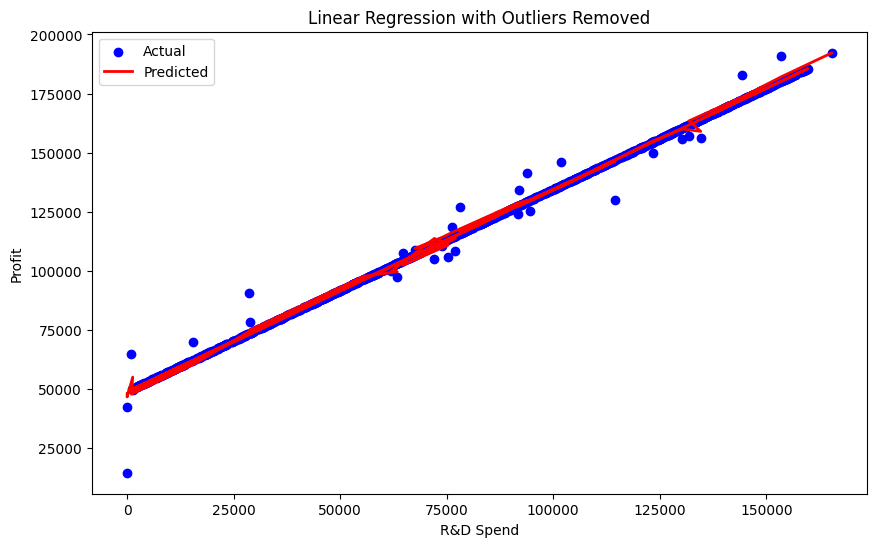

In [22]:
# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(data_cleaned['R&D Spend'], y, color='blue', label='Actual')
plt.plot(data_cleaned['R&D Spend'], predictions, color='red', linewidth=2, label='Predicted')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.legend()
plt.title('Linear Regression with Outliers Removed')
plt.show()

In [24]:
# Evaluate the model
# Calculate MSE, RMSE, and NRMSE
mse = mean_squared_error(y, predictions)
rmse = np.sqrt(mse)
nrmse = rmse / (y.max() - y.min())

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Normalized Root Mean Squared Error (NRMSE):", nrmse)
print("R-squared (R^2):", r2_score(y, predictions))

Mean Squared Error (MSE): 3060488.95781669
Root Mean Squared Error (RMSE): 1749.4253221605918
Normalized Root Mean Squared Error (NRMSE): 0.009851453350803306
R-squared (R^2): 0.9980662043772283
